In [1]:
import galpy
import numpy as np
from galpy.orbit import Orbit
import astropy.units as u
from astropy.coordinates import SkyCoord
from galpy.orbit import OrbitDistribution
from galpy.potential import MWPotential2014
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
nrand= 30
ras= np.random.uniform(size=nrand)*360.*u.deg
decs= 90.*(2.*np.random.uniform(size=nrand)-1.)*u.deg
dists= np.random.uniform(size=nrand)*10.*u.kpc
pmras= 20.*(2.*np.random.uniform(size=nrand)-1.)*20.*u.mas/u.yr
pmdecs= 20.*(2.*np.random.uniform(size=nrand)-1.)*20.*u.mas/u.yr
vloss= 200.*(2.*np.random.uniform(size=nrand)-1.)*u.km/u.s
# Without any custom coordinate-transformation parameters
co = SkyCoord(ra=ras,dec=decs,distance=dists,
                 pm_ra_cosdec=pmras,pm_dec=pmdecs,
                 radial_velocity=vloss,
                 frame='icrs')
orbits = Orbit(co)
print(orbits.ra()[:3],ras[:3])

[1.50127922e+02 2.59316818e+02 4.11749371e-02] deg [1.50127922e+02 2.59316818e+02 4.11749342e-02] deg


In [3]:
od = OrbitDistribution(orbits)

ts = np.linspace(0.,1.,20)
od.integrate(ts, MWPotential2014)

ra = od.ra()
print(ra.shape)
ra.pdf_mean()

()


<Quantity 156.76122735 deg>

In [4]:
od = OrbitDistribution.from_icrs_cov(orbits[0], np.eye(6)*1e-2, n_samples=1000)
od.integrate(ts, MWPotential2014)


Orbit([RA,Dec,distance,pmRA,pmDec,Vlos],radec=True)

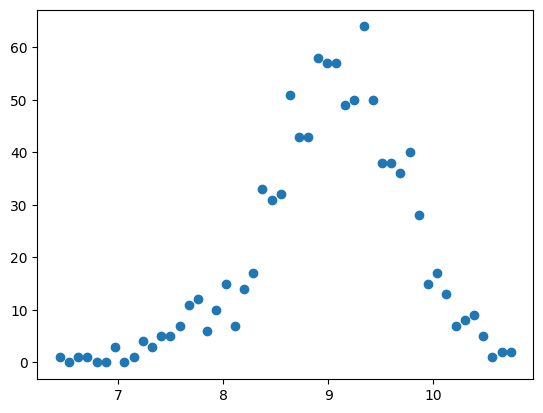

In [5]:
ra = od.ra(ts[-1])

hist, edges = ra.pdf_histogram(bins=50)
plt.scatter(edges[:-1] + edges[1:]/2, hist)

In [6]:
od2 = OrbitDistribution.from_galactocentric_cov(orbits[0], np.eye(6)*1e-2, n_samples=1000)
od2.integrate(ts, MWPotential2014)

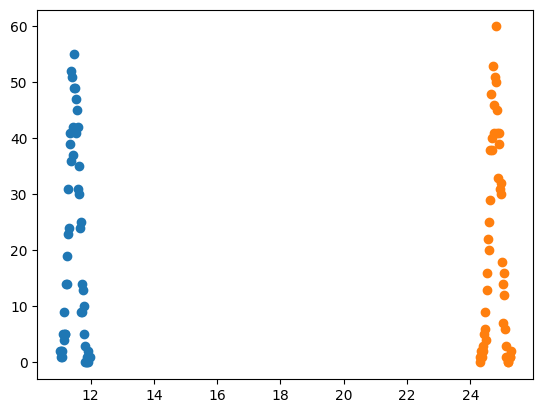

In [7]:
ra = od2.x(ts[0])
hist, edges = ra.pdf_histogram(bins=50)
plt.scatter(edges[:-1] + edges[1:]/2, hist)

ra = od2.x(ts[-1])
hist, edges = ra.pdf_histogram(bins=50)
plt.scatter(edges[:-1] + edges[1:]/2, hist)

## Working with Gaia data

See https://pyia.readthedocs.io/en/latest/index.html for this example code

In [9]:
from pyia import GaiaData
import os.path, pyia

In [11]:
data_path = os.path.join(os.path.split(pyia.__file__)[0], 'tests/data')

g = GaiaData(f'{data_path}/gdr2_sm.fits')
g

<GaiaData: 100 rows>

In [45]:
samples = g[0].get_error_samples(size=1000).skycoord[0]
samples[:3]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(192.37472723, -58.59207335, 4483.79557431),
     (192.37472723, -58.59207336, 4311.99451903),
     (192.37472722, -58.59207336, 4469.68807901)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-7.07406466, 1.48292168,  2.41480251e+19),
     (-7.07135817, 1.51904068, -9.39886526e+19),
     (-7.07579528, 1.48075712,  1.53196064e+20)]>

In [46]:
# for a prettier plot, fix the radial velocity
samples.data.differentials['s']._d_distance = 10 * u.km / u.s 

In [48]:
od3 = OrbitDistribution(Orbit(samples))
od3.integrate(ts, MWPotential2014)


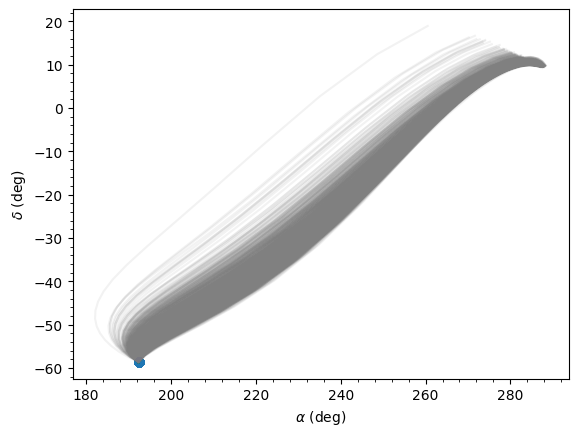

In [59]:
od3.plot(d1="ra", d2="dec", c='gray', alpha=0.1)
plt.scatter(od3.ra().distribution, od3.dec().distribution)